In [1]:
import csv

import re
f = open('cleaned_users_tweets.csv','r')
r1 = csv.reader(f)
alltweets = []
for row in r1:
    if(len(row)!=0):
        t=row[0]
        alltweets.append(re.sub(r'x[0-9a-fA-F]+|RT',r'', t))
    


In [2]:
f1 = open('cleaned_bots_tweets.csv','r')
r2 = csv.reader(f1)
alltweetsb = []
for row in r2:
    if(len(row)!=0):
        t=row[0]
        alltweetsb.append(re.sub(r'x[0-9a-fA-F]+|RT',r'', t))
    


In [3]:
botdes=[]
for i in range(0,len(alltweets)):
    botdes.append(0)
for i in range(0,len(alltweetsb)):
    botdes.append(1)

In [4]:
data_tweets= alltweets+alltweetsb

In [5]:
import random

c=zip(data_tweets,botdes)
c=list(c)
dd=random.sample(c,192)
cross_v=[]
for l in c:
    if l not in dd:
        cross_v.append(l)


In [6]:
tt=[]
yy=[]
for i in range(0,192):
    tt.append(c[i][0]);
for i in range(0,192):
    yy.append(c[i][1]);
cvc=[]
for i in range(0,len(cross_v)):
    cvc.append(cross_v[i][0])
pp=[]
for i in range(0,len(cross_v)):
    pp.append(cross_v[i][1])


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(tt)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(192, 1049)


In [9]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
with np.errstate(divide='ignore'):
    clf = MultinomialNB().fit(X_train_tfidf, yy)
    X_new_counts = count_vect.transform(cvc)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)

    predicted= clf.predict(X_new_tfidf);


In [10]:
from sklearn import metrics
with np.errstate(divide='ignore'):
    fpr, tpr, thresholds = metrics.roc_curve(pp, predicted)
    print("ACCURACY     PRECISION   RECALL     f1 Score   AUC")
    print(metrics.accuracy_score(pp,predicted),metrics.precision_score(pp,predicted),metrics.recall_score(pp, predicted),
metrics.f1_score(pp, predicted),metrics.auc(fpr,tpr));


ACCURACY     PRECISION   RECALL     f1 Score   AUC
0.40763099187 0.0 0.0 0.0 0.5


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
import matplotlib.pyplot as plt
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, color="blue",
label='ROC fold ')

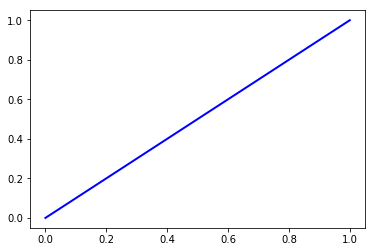

In [14]:
plt.show()